Average Color for Normal Image: 123.31323333333333 	 | threshold: 147.97588
Average Color for Bacterial Pneumonia Image: 129.81963333333334 	 | threshold: 253.4286219306295
Final Mask for Normal Image:


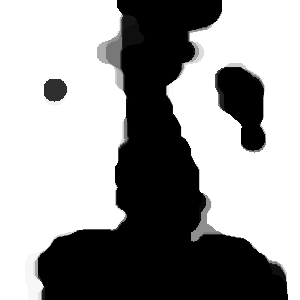

Final Mask for Bacterial Pneumonia Image:


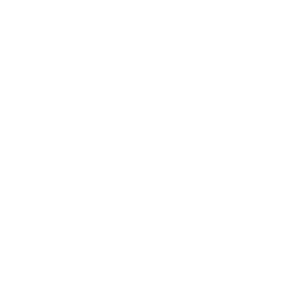

Final Result:


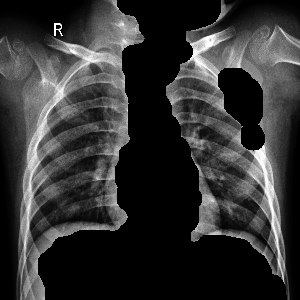

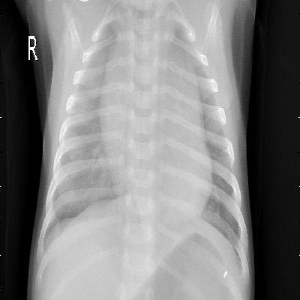

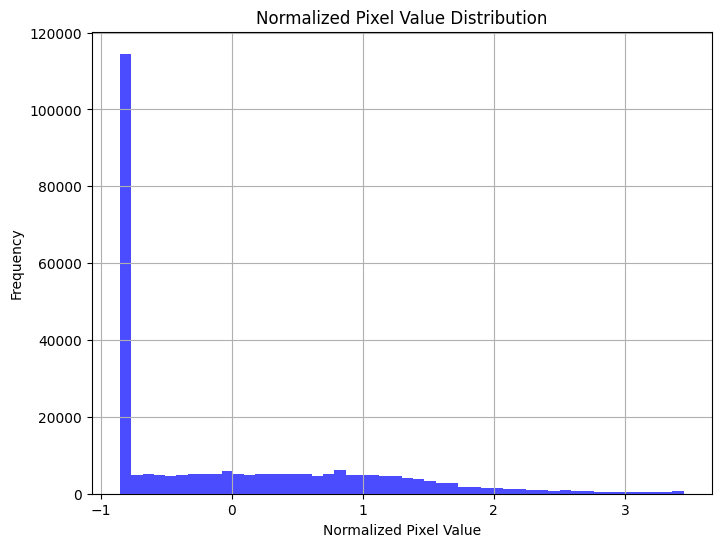

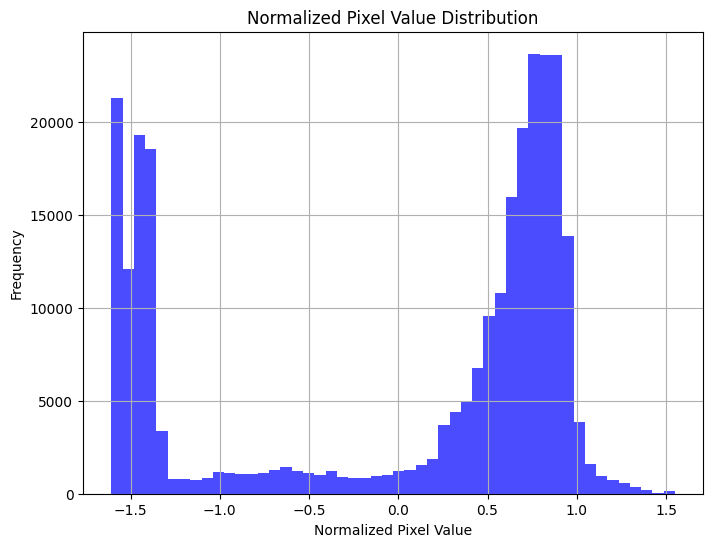

In [3]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# Function to create the image mask
def create_mask(image_path, threshold):
    # Load the CXR image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to create the mask
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    
    return binary

# Function to resize the image
def resize_image(image, width, height):
    resized_image = cv2.resize(image, (width, height))
    return resized_image

# Function to reverse the colors of the image
def reverse_image(image):
    reversed_image = 255 - image
    return reversed_image

# Function to apply morphological operations
def apply_morphological_operations(image, scale, very_dark_scale):
    # Parameters for noise reduction
    opening_size = int(scale * 0.1)  # Adjust as needed for the size of noise to be removed
    closing_size = int(scale * 0.2)  # Adjust as needed for the size of gaps to be filled
    
    # Perform morphological opening to reduce white noise
    opening_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (opening_size, opening_size))
    opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, opening_kernel)
    
    # Perform morphological closing to fill black holes/gaps inside white regions
    closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (closing_size, closing_size))
    closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, closing_kernel)
    
    closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (closing_size, closing_size))
    closed_image = cv2.morphologyEx(closed_image, cv2.MORPH_CLOSE, closing_kernel)
    
    closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (closing_size, closing_size))
    closed_image = cv2.morphologyEx(closed_image, cv2.MORPH_CLOSE, closing_kernel)
    
    return closed_image

# Function to overlay resized original image with the mask created
def overlay_with_mask(original_image, mask):
    # Convert the mask to 3-channel format
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    
    # Apply the mask to the original image
    overlaid_image = np.where(mask_rgb == 0, 0, original_image)
    
    return overlaid_image

# Function to display the image
def display_image(image):
    display(Image.fromarray(image))

# Function to calculate the average color of an image
def calculate_average_color(image):
    average_color = np.mean(image, axis=(0, 1))
    return average_color[0]

def calculate_threshold(avg_color):
    avg_const = 1.2
    if avg_color > 125:
        return avg_const*(avg_color**1.1)
    else:
        return avg_const*avg_color

# Function to plot the normal distribution of pixel values
def plot_pixel_distribution(image):
    pixel_values = image.flatten()
    mean_pixel = np.mean(pixel_values)
    std_pixel = np.std(pixel_values)
    
    # Normalize the pixel values
    normalized_values = (pixel_values - mean_pixel) / std_pixel
    
    plt.figure(figsize=(8, 6))
    plt.hist(normalized_values, bins=50, color='blue', alpha=0.7)
    plt.title('Normalized Pixel Value Distribution')
    plt.xlabel('Normalized Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Path to the CXR image
n_image_path = 'train/Normal/010.jpeg'
bp_image_path = 'train/Bacterial Pneumonia/10.jpeg'

# Desired width and height for resizing
desired_width = 300
desired_height = 300

# Overlay with original image
n_image = cv2.imread(n_image_path)
bp_image = cv2.imread(bp_image_path)

n_image = resize_image(n_image, desired_width, desired_height)
bp_image = resize_image(bp_image, desired_width, desired_height)

# Display average color of the images
average_color1 = calculate_average_color(n_image)
average_color2 = calculate_average_color(bp_image)

threshold1 = calculate_threshold(average_color1)
threshold2 = calculate_threshold(average_color2)
print("Average Color for Normal Image:", average_color1, "\t | threshold:",threshold1 )
print("Average Color for Bacterial Pneumonia Image:",average_color2, "\t | threshold:",threshold2)

# Create the image mask
mask1 = create_mask(n_image_path, threshold1)
mask2 = create_mask(bp_image_path, threshold2)

# Resize the mask
mask1 = resize_image(mask1, desired_width, desired_height)
mask2 = resize_image(mask2, desired_width, desired_height)

# Reverse the color
mask1 = reverse_image(mask1)
mask2 = reverse_image(mask2)

scale = 110
very_dark_scale = 10
# Apply morphological operations
mask1 = apply_morphological_operations(mask1, scale, very_dark_scale)
mask2 = apply_morphological_operations(mask2, scale, very_dark_scale)

# Display the resized mask
print("Final Mask for Normal Image:")
display_image(mask1)
print("Final Mask for Bacterial Pneumonia Image:")
display_image(mask2)

# Final result
print("Final Result:")
n_image = overlay_with_mask(n_image, mask1)
bp_image = overlay_with_mask(bp_image, mask2)
display_image(n_image)
display_image(bp_image)

# Plot pixel distribution for the original images
plot_pixel_distribution(n_image)
plot_pixel_distribution(bp_image)
